# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [77]:
## Create the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=15)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [79]:
# Model training
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [80]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = logistic.predict(X_test)
print(y_pred)

[1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1
 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 1 0]


In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
score = accuracy_score(y_test, y_pred)
print(score)

0.93


In [84]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[126   9]
 [ 12 153]]


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       135
           1       0.94      0.93      0.94       165

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Hyperparameter Tuning and Cross Validation

In [86]:
model = LogisticRegression(max_iter=10000)

penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [87]:
param_grid = [
    {'penalty': ['l1'], 'C': c_values, 'solver': ['liblinear', 'saga']},
    {'penalty': ['l2'], 'C': c_values, 'solver': solver},
    {'penalty': ['elasticnet'], 'C': c_values, 'solver': ['saga'], 'l1_ratio': [0.5, 0.7, 0.9]}
]

In [88]:
## Grid Search CV
## Finds the better parameters to be used for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [89]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01],
                          'l1_ratio': [0.5, 0.7, 0.9],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [90]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01],
                          'l1_ratio': [0.5, 0.7, 0.9],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [91]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [92]:
grid.best_score_

0.9214285714285715

In [93]:
y_pred = grid.predict(X_test)

In [94]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9333333333333333


In [95]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[128   7]
 [ 13 152]]


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       135
           1       0.96      0.92      0.94       165

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Randomized Search CV

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
model = LogisticRegression(max_iter=10000)
randomcv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy')

In [100]:
randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
                   param_distributions=[{'C': [100, 10, 1.0, 0.1, 0.01],
                                         'penalty': ['l1'],
                                         'solver': ['liblinear', 'saga']},
                                        {'C': [100, 10, 1.0, 0.1, 0.01],
                                         'penalty': ['l2'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag',
                                                    'saga']},
                                        {'C': [100, 10, 1.0, 0.1, 0.01],
                                         'l1_ratio': [0.5, 0.7, 0.9],
                                         'penalty': ['elasticnet'],
                                         'solver': ['saga']}],
                   scoring='accuracy')

In [101]:
randomcv.best_score_

0.9199999999999999

In [102]:
randomcv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}

In [103]:
y_pred = randomcv.predict(X_test)

In [104]:
score = accuracy_score(y_test, y_pred)
print(score)

0.93


In [105]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[126   9]
 [ 12 153]]


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       135
           1       0.94      0.93      0.94       165

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Multiclass classification problems (OVR)

In [108]:
## Create the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=15)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [113]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(multi_class='ovr')

In [114]:
logistic.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [115]:
y_pred = logistic.predict(X_test)

In [116]:
y_pred

array([1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2,
       1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0,
       1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1,
       0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0,
       1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0])

In [117]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7833333333333333


In [118]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79 16  4]
 [ 3 87 22]
 [ 8 12 69]]


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        99
           1       0.76      0.78      0.77       112
           2       0.73      0.78      0.75        89

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



## Logsitic Regression for Imbalanced Dataset

In [120]:
from collections import Counter
from sklearn.datasets import make_classification

In [122]:
## Imbalanced Dataset
X, y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [123]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [124]:
Counter(y)

Counter({0: 9846, 1: 154})

In [125]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

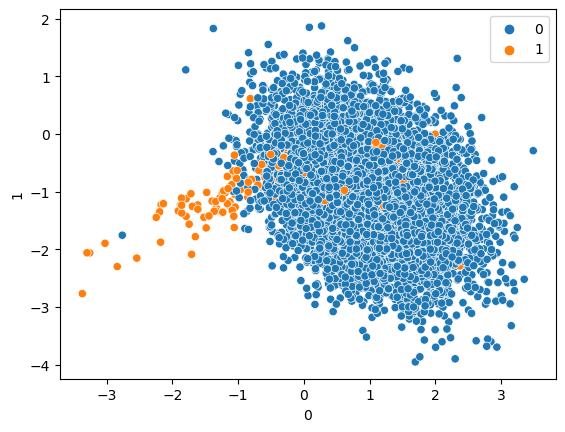

In [128]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [129]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [138]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

In [139]:
## Hyperparameter tuning

penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0: w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [140]:
ams=dict(penalty=penalty,C=c_values, solver=solver, class_weight=class_weight)

In [141]:
ams

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=ams, scoring='accuracy', cv=cv, n_jobs=-1)

In [143]:
grid.fit(X_train, y_train)

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diegoagd10/anaconda3/lib/python3.10/sit

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [144]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [145]:
grid.best_score_

0.9882666666666667

In [146]:
y_pred = grid.predict(X_test)

In [147]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9896


In [148]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2465    0]
 [  26    9]]


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500



## Logistic Regression with ROC curve and ROC AUC score

In [2]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
# Created a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
## Lects create a basic logistic model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
## Prediction based on probability
model_prob = model.predict_proba(X_test)

In [8]:
## Lets focus on the positive outcome
model_prob = model_prob[:, 1]

In [12]:
# Lets calculate the scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print('Dummy: ROC AUC=%.3f' % (dummy_model_auc))
print('Logistic: ROC AUC=%.3f' % (model_auc))

Dummy: ROC AUC=0.500
Logistic: ROC AUC=0.908


## False positive rate

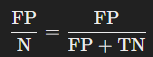

## True positive rate (Sensivity, recall, hit rate)

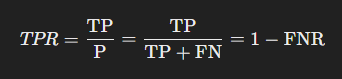

In [26]:
## Calculate ROC values
dummy_model_fpr, dummy_model_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [21]:
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

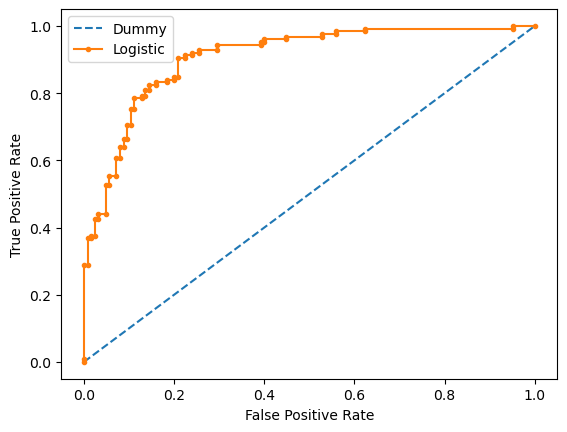

In [35]:
# Plot the roc curve for the model
plt.plot(dummy_model_fpr, dummy_model_tpr, linestyle='--', label='Dummy')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


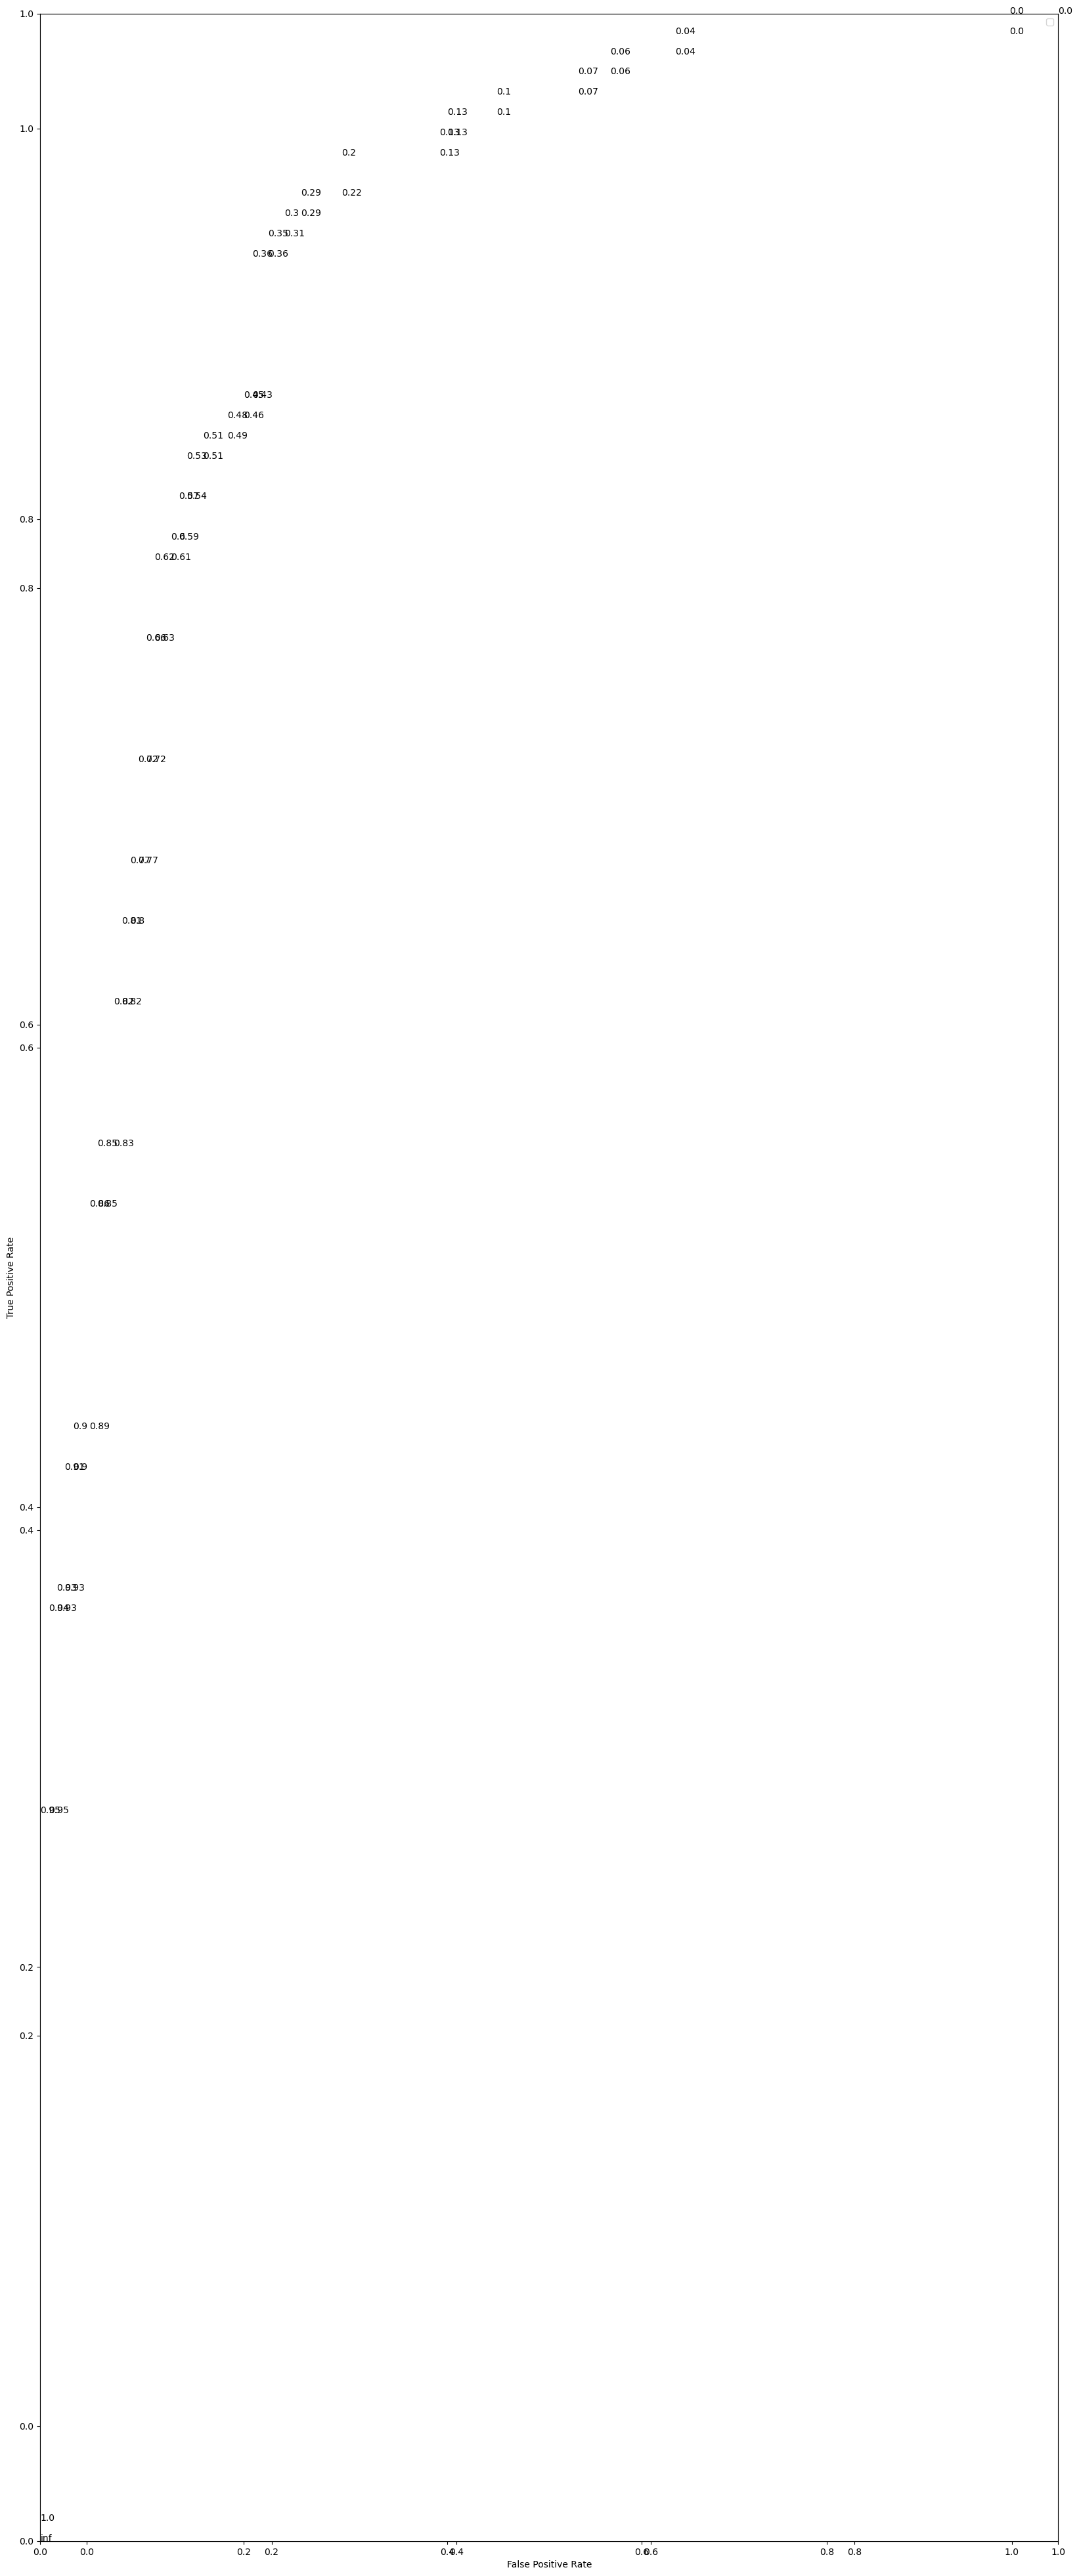

In [44]:
# Plot the roc curve for the model
import numpy as np
fig = plt.figure(figsize=(20, 50))
plt.plot(dummy_model_fpr, dummy_model_tpr, linestyle='--', label='Dummy')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()